### Linear Models

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

### Побудова Моделі

In [30]:
# W - ваги модели, на яки перемножаються ознаки
W = None
# b - bias, додається до результату множення вагів на ознаки
b = None

def mse(preds, y):
    """
    повертає середньоквадратичну помилку між preds та y.
    """
    return ((preds - y)**2).mean()

def solve_weights(X, y):
    """
    Обчислює значення W,b методом найменших квадратів для X та y.
    """
    global W, b
    
    
    N = X.shape[0]
    # додаємо до ознак фіктивний розмір
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    W_full = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    W = W_full[1:]
    b = np.array([W_full[0]])

In [31]:
def grad_descent(X, y, lr, num_iter=100):
    
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    """
   Передбачує занчення y, користуючись поточні значення W та b
    """
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

### Отримання даних

In [32]:
def generate_data(range_, a, b, std, num_points=100):
    """Генерує дани, що підпорядковуються залежності y = a*x + b + е,
    де е - нормально розподілене зі стандартним відхиленням std и нульовим середнім."""
    X_train = np.random.random(num_points) * (range_[1] - range_[0]) + range_[0]
    y_train = a * X_train + b + np.random.normal(0, std, size=X_train.shape)
    
    return X_train, y_train

In [33]:
# Задамо параметри
real_a = 0.34
real_b = 13.7
real_std = 7

# Згенеруємо дані на проміжку від 0 до 150
X_train, y_train = generate_data([0, 150], real_a, real_b, real_std)


pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,29.101187,22.003854
1,113.073576,50.462121
2,63.800397,48.507225
3,39.271733,24.452730
4,131.792892,51.722143


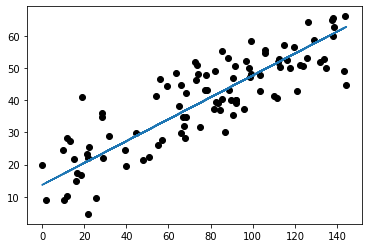

In [34]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

### Знайдемо W та b, за допомогою методу найменших квадратів

In [35]:
solve_weights(X_train.reshape(-1, 1), y_train)

In [36]:
W, b

(array([0.30511512]), array([16.38912296]))

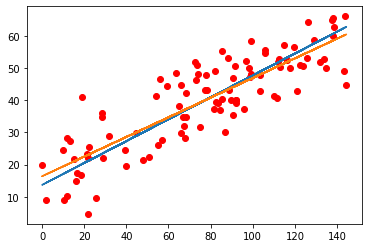

In [37]:
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

### Знайдемо W та b, за допомогою методу градієнтного спуску

In [38]:
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

In [39]:
W, b

(array([0.46903296]), array([0.41957357]))

([<matplotlib.lines.Line2D at 0x16e853d90>], 108.37921627004089)

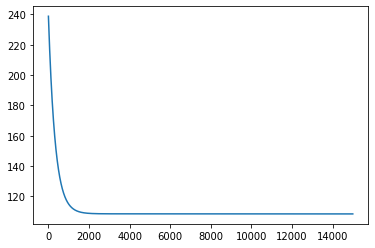

In [40]:
# Loss function plot
plt.plot(losses), losses[-1]

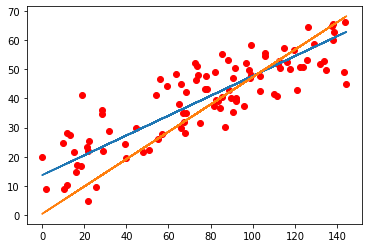

In [41]:
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, real_a * X_train + real_b)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

### Example2

In [42]:
df = pd.read_csv("./data.csv", sep=',')

In [43]:
df.head(3)

,Index,A1,A2,A3,A4,B
0,1,75,91,6,85,4815
1,2,6,48,48,48,234
2,3,5,60,24,40,160


In [44]:
df.shape

(96, 6)

In [45]:
# поділимо дані на ознаки та їх значення
data, label = np.array(df)[:, 1:5], np.array(df)[:, 5]

### Знайдемо W та b, за допомогою методу найменших квадратів

In [46]:
solve_weights(data, label)

In [47]:
W,b

(array([ 3.29211245,  6.54097099, 24.3858116 , -7.47819654]),
 array([2030.27050104]))

In [48]:
# Помилка:
mse(predict(data), label)

3731984.960573224

### Знайдемо W та b, за допомогою методу градієнтного спуску

In [49]:
losses = grad_descent(data, label, 1e-7, 10500)

In [50]:
W, b

(array([ 3.99318259,  8.4809165 , 31.11092115, 13.64192265]),
 array([61.85665713]))

([<matplotlib.lines.Line2D at 0x16e710ac0>], 4316326.895536854)

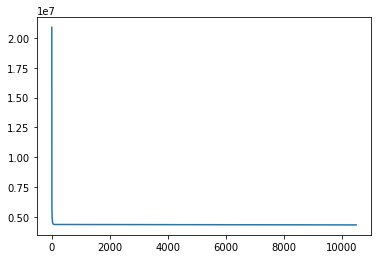

In [51]:
plt.plot(losses), losses[-1]

In [52]:
mse(predict(data), label)

4316323.511977272

### Нормалізація даних

In [53]:
data.mean(axis=0)

array([112.45833333,  88.5       ,  59.125     ,  48.45833333])

In [54]:

data.std(axis=0)

array([105.44379592,  70.38954113,  45.16018942,  25.4521269 ])

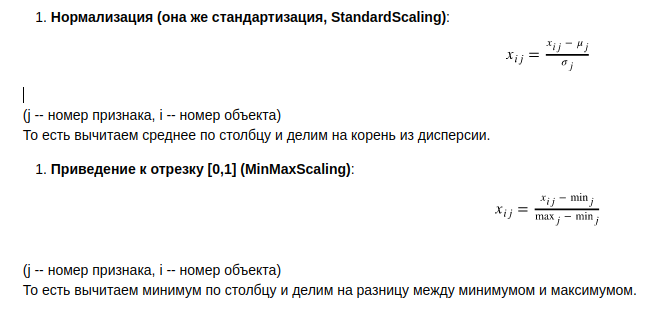

### Домашнє завдання

- Нормалізуйте дані та отримайти нові результати для методу найменших квадратів та градієнтного спускую Порівняйте результати
- Спорбуйте різну швидкість навчання (learning rate), спробуйте знайти оптимальне значення цього параметру

In [67]:
def normalize(data):
  min = np.min(data, axis=0)
  max = np.max(data, axis=0)
  return (data - min) / (max - min)

dataSet = pd.read_csv("./data.csv", sep=',')
data, label = np.array(dataSet)[:, 1:5], np.array(df)[:, 5]
data = normalize(data)
solve_weights(data, label)

print(mse(predict(data), label))

def test(rate, count):
  losses = grad_descent(data, label, rate, count)

  ax = plt.subplot()
  plt.plot(losses, label=f'rate={rate}, count={count}')
  ax.legend()

3731984.960573223


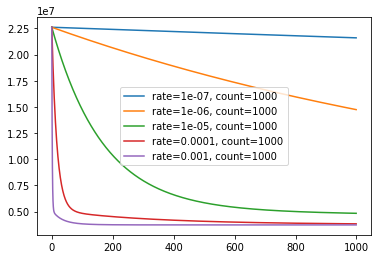

In [68]:
test(1e-7, 1000)
test(1e-6, 1000)
test(1e-5, 1000)
test(1e-4, 1000)
test(1e-3, 1000)

Судя по графикам, оптимальная скорость обучения равна 1е-05